## Exploring activation functions


An activation function, also known as a transfer function, plays a vital role in neural
networks. It is used to introduce non-linearity in neural networks. As we learned before, we
apply the activation function to the input, which is multiplied by weights and added to the
bias, that is, $f(z)$ , where z = (input * weights) + bias and $f(\cdot)$ is the activation function. If we do
not apply the activation function, then a neuron simply resembles the linear regression. The
aim of the activation function is to introduce a non-linear transformation to learn the
complex underlying patterns in the data.

Now let's look at some of the interesting commonly used activation functions.

## The sigmoid function

The sigmoid function is one of the most commonly used activation functions. It scales the
value between 0 and 1. The sigmoid function can be defined as follows:



$$f(x)=\frac{1}{1+e^{-x}}$$

It is an S-shaped curve as shown below:

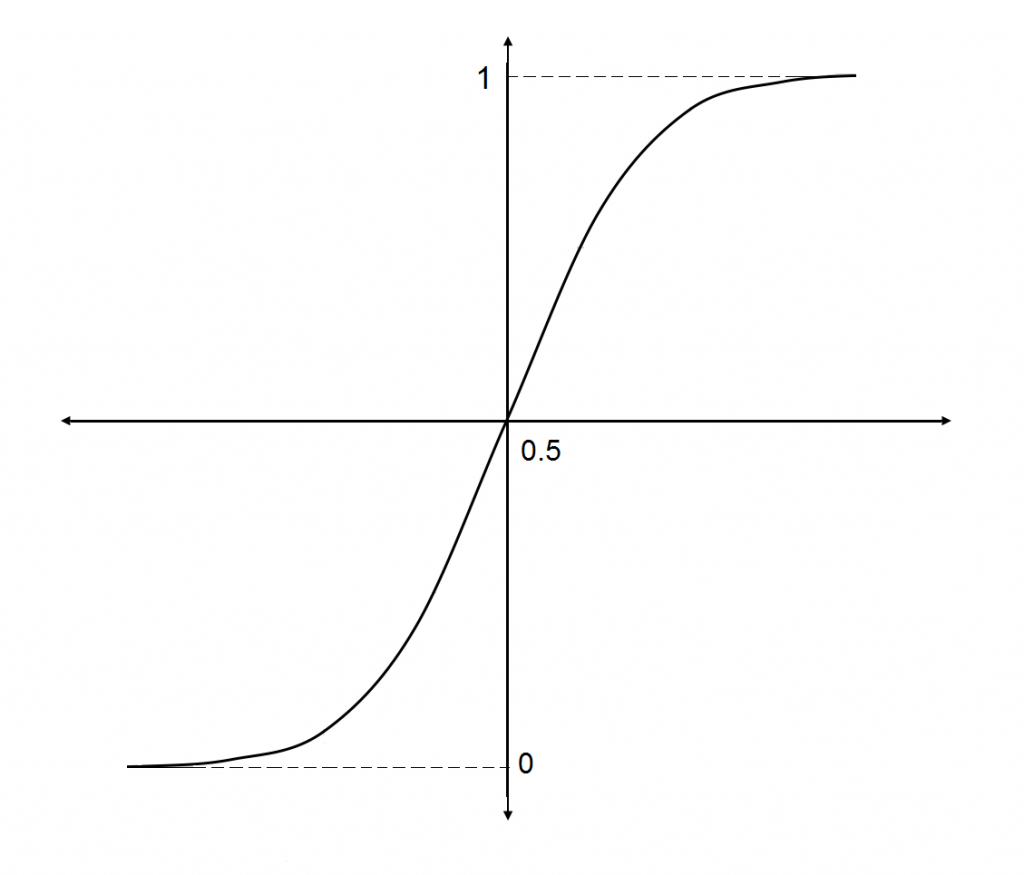]

It is differentiable, meaning that we can find the slope of the curve at any two points. It is
monotonic, which implies it is either entirely non-increasing or non-decreasing. The
sigmoid function is also known as a logistic function. As we know that probability lies
between 0 and 1 and since the sigmoid function squashes the value between 0 and 1, it is
used for predicting the probability of output.
The sigmoid function can be defined in python as follows:


In [5]:
def sigmoid(x):
    return 1/ (1+np.exp(-x))

## The tanh function

A hyperbolic tangent (tanh) function outputs the value between -1 to +1 and is expressed
as follows: 
    
$$f(x)=\frac{1-e^{-2 x}}{1+e^{-2 x}} $$
    
It also resembles the S-shaped curve. Unlike a sigmoid function which is centered on 0.5,
the tanh function is 0 centered, as shown in the following diagram:
    
![images](images/7.png)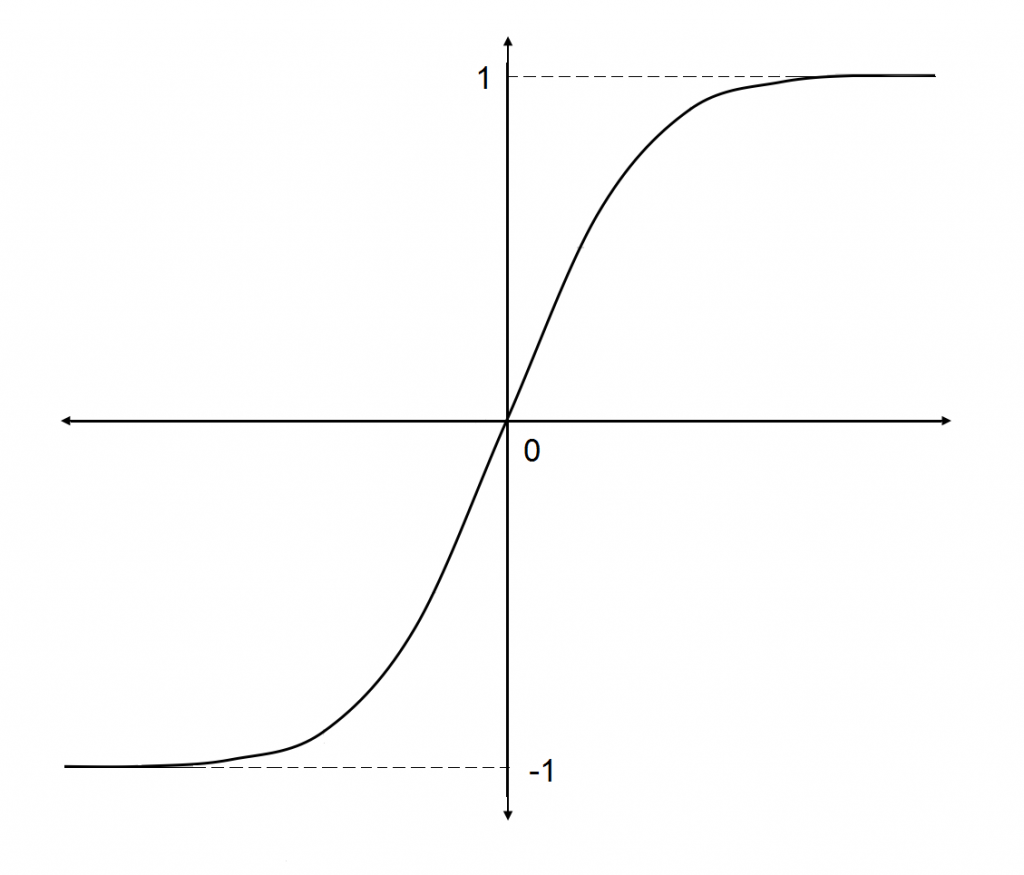
    
Similar to the sigmoid function, it is also a differentiable and monotonic function. The tanh
function is implemented as follows:
    
    
    

In [6]:
def tanh(x):
    numerator = 1-np.exp(-2*x)
    denominator = 1+np.exp(-2*x)
    return numerator/denominator

## The Rectified Linear Unit function

The Rectified Linear Unit (ReLU) function is another one of the most commonly used
activation functions. It outputs a value from o to infinity. It is basically a piecewise function
and can be expressed as follows: 
    

$$ f(x)=\left\{\begin{array}{ll}{0} & {\text { for } x<0} \\ {x} & {\text { for } x \geq 0}\end{array}\right.$$
               
               
That is, $f(x)$ returns zero when the value of x is less than zero and $f(x)$ returns x when the
value of x is greater than or equal to zero. It can also be expressed as follows: 

$$ f(x)=\max (0, x)$$

The ReLU function is shown in the following figure:

![images]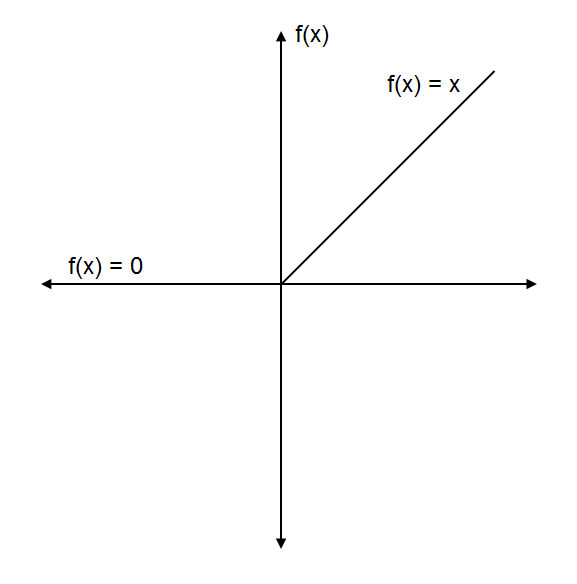(images/8.png)

As we can see in the preceding diagram, when we feed any negative input to the ReLU
function, it converts it to zero. The snag for being zero for all negative values is a problem
called dying ReLU, and a neuron is said to be dead if it always outputs zero. A ReLU
function can be implemented as follows:



In [7]:
def ReLU(x):
    if x<0:
        return 0
    else:
        return x

## The leaky ReLU function

Leaky ReLU is a variant of the ReLU function that solves the dying ReLU problem. Instead
of converting every negative input to zero, it has a small slope for a negative value as
shown:

![images](images/9.png)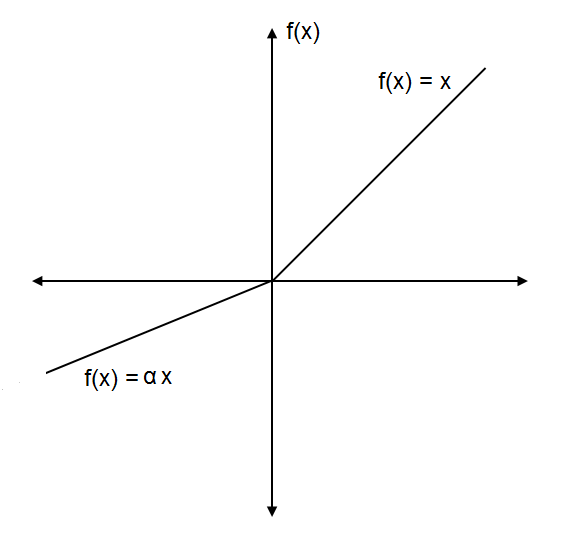

Leaky ReLU can be expressed as follows:

$$ f(x)=\left\{\begin{array}{ll}{\alpha x} & {\text { for } x<0} \\ {x} & {\text { for } x \geq 0}\end{array}\right.$$



In [8]:
def leakyReLU(x,alpha=0.01):
    if x<0:
        return (alpha*x)
    else:
        return x



 The value  $\alpha$ of is typically set to 0.01. The leaky ReLU function is implemented as follows:
Instead of setting some default values to $\alpha$, we can send them as a parameter to a neural
network and make the network learn the optimal value of  $\alpha$. Such an activation function
can be termed as a Parametric ReLU function. We can also set the value of  $\alpha$ to some
random value and it is called as Randomized ReLU function. 

## The Exponential linear unit function

Exponential linear unit (ELU), like Leaky ReLU, has a small slope for negative values. But
instead of having a straight line, it has a log curve, as shown in the following diagram:
   
![images](images/10.png)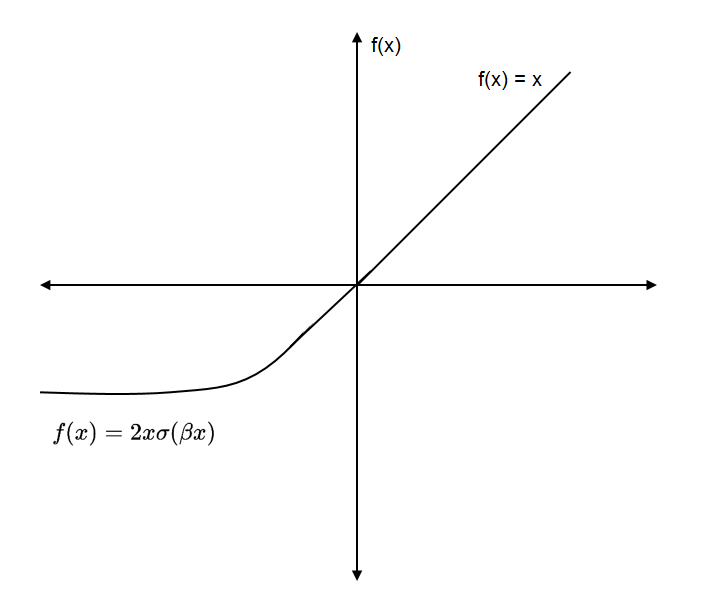
    
It can be expressed as follows:
    
$$ f(x)=\left\{\begin{array}{ll}{\alpha\left(e^{x}-1\right)} & {\text { for } x<0} \\ {x} & {\text { for } x \geq 0}\end{array}\right.$$
The ELU function is implemented in python as follows:


In [9]:
def ELU(x,alpha=0.01):
    if x<0:
        return (alpha*(np.exp(x)-1))

    else:
        return x

## The Swish function
The Swish function is a recently introduced activation function by Google. Unlike other
activation functions, which are monotonic, Swish is a non-monotonic function, which
means it is neither always non-increasing nor non-decreasing. It provides better
performance than ReLU. It is simple and can be expressed as follows:
    

$$f(x)=x \sigma(x)$$

Here, $\sigma(x)$ is the sigmoid function. The Swish function is shown in the following diagram:

![images](images/11.png)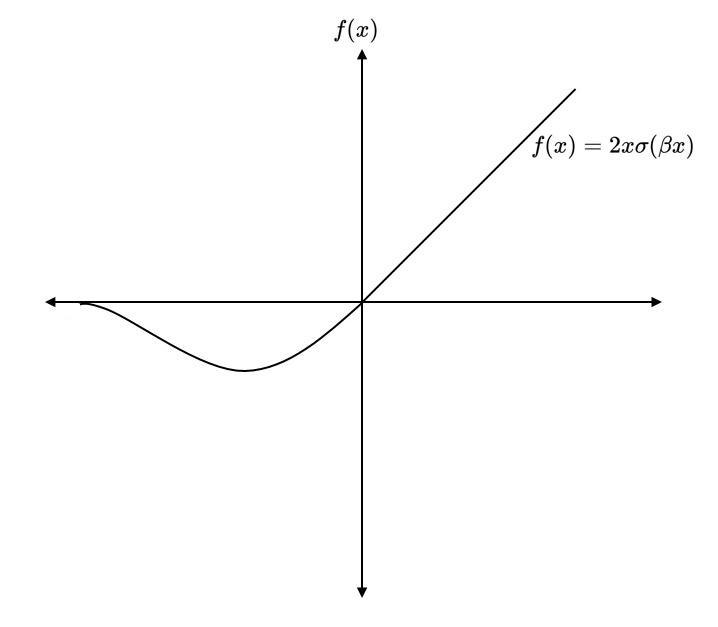
    
    
We can also reparametrize the Swish function and express it as follows:
    
$$f(x)=2 x \sigma(\beta x)$$


When the value of $\beta$ is 0, then we get the identity function $f(x) = x$.
It becomes a linear function and, when the value of $\beta$ tends to infinity, then $f(x)$ becomes
$ 2max (0, x)$, which is basically the ReLU function multiplied by some constant value. So, the
value of $\beta$ acts as a good interpolation between a linear and a nonlinear function. The swish
function can be implemented as shown below:

In [10]:
def swish(x,beta):
    return 2*x*sigmoid(beta*x)

# The softmax function


The softmax function is basically the generalization of the sigmoid function. It is usually
applied to the final layer of the network and while performing multi-class classification
tasks. It gives the probabilities of each class for being output and thus, the sum of softmax
values will always equal 1.

It can be represented as follows:
$$f\left(x_{i}\right)=\frac{e^{x_{i}}}{\sum_{j} e^{x_{j}}}$$

As shown in the following diagram, the softmax function converts their inputs to
probabilities:
    
![images](images/12.png)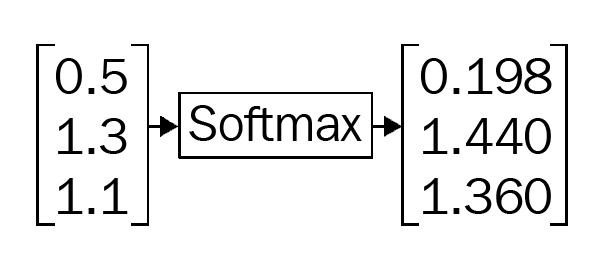
    
    
    The softmax function can be implemented in python as follows:

In [11]:
def softmax(x):
    return np.exp(x) / np.exp(x).sum(axis=0)